In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [59]:
df=pd.read_csv("D:\milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [4]:
X=df.drop('Grade', axis=1)
y=df['Grade']

In [5]:
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [6]:
# here you can see there is no target variable

here we can see the feature name of the given dataset

In [7]:
df.shape

(1059, 8)

In [8]:
pd.isnull(df).sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

so as we can see there is no any null values in dataset

In [9]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Text(0.5, 1.0, 'Grade v/s colour')

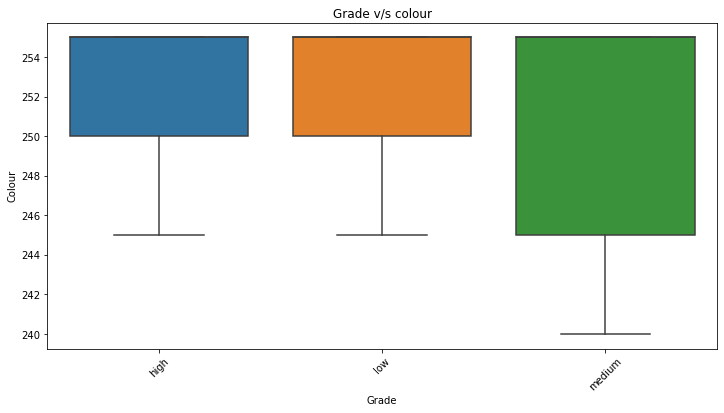

In [10]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Colour', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s colour')

In [11]:
# now let us check outliers in given dataset
#An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.

Text(0.5, 1.0, 'outliers graph')

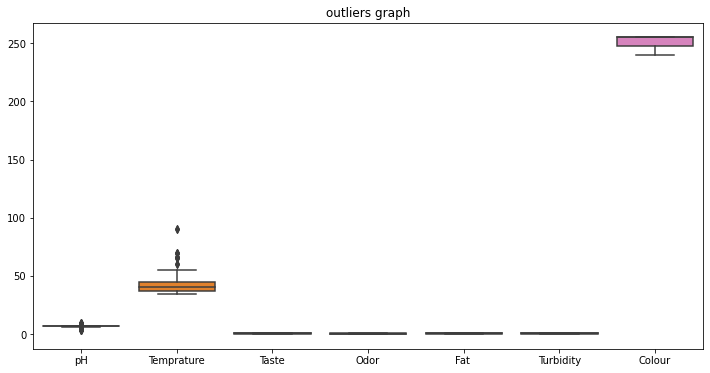

In [12]:
plt.figure(figsize = (12, 6))
sns.boxplot(data=df[:100])
plt.title('outliers graph')

In [13]:
# from this boxplot we can clearly see that values below 100 hav esome outliers at temperature 

Text(0.5, 1.0, 'Grade v/s Turbidity')

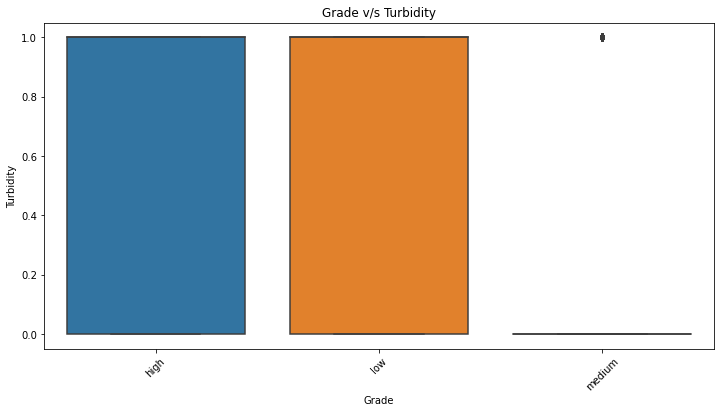

In [14]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Turbidity', data=df)
plt.xticks(rotation=45)
plt.title('Grade v/s Turbidity')

Text(0.5, 1.0, 'Grade v/s Fat ')

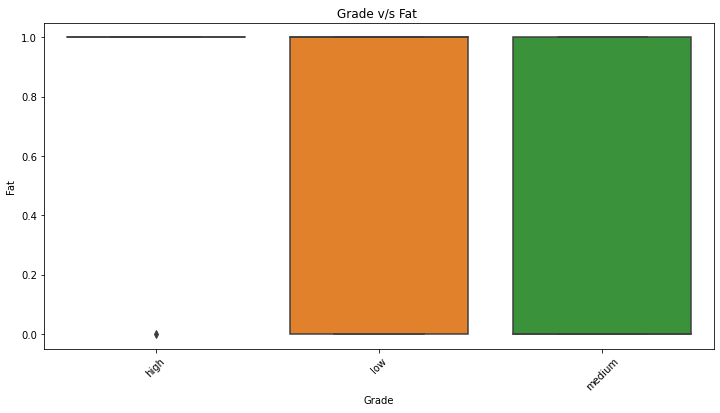

In [15]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Fat ', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Fat ')

Text(0.5, 1.0, 'Grade v/s Odor')

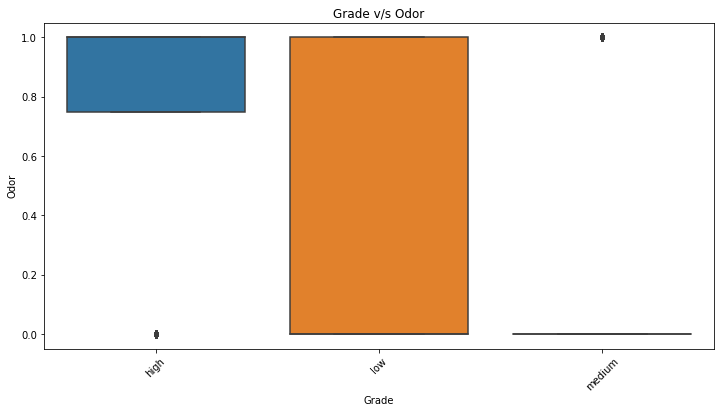

In [16]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Odor', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Odor')

Text(0.5, 1.0, 'Grade v/s pH')

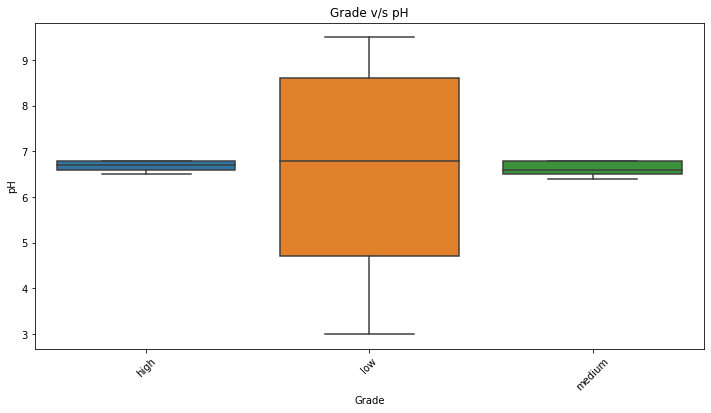

In [17]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='pH', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s pH')

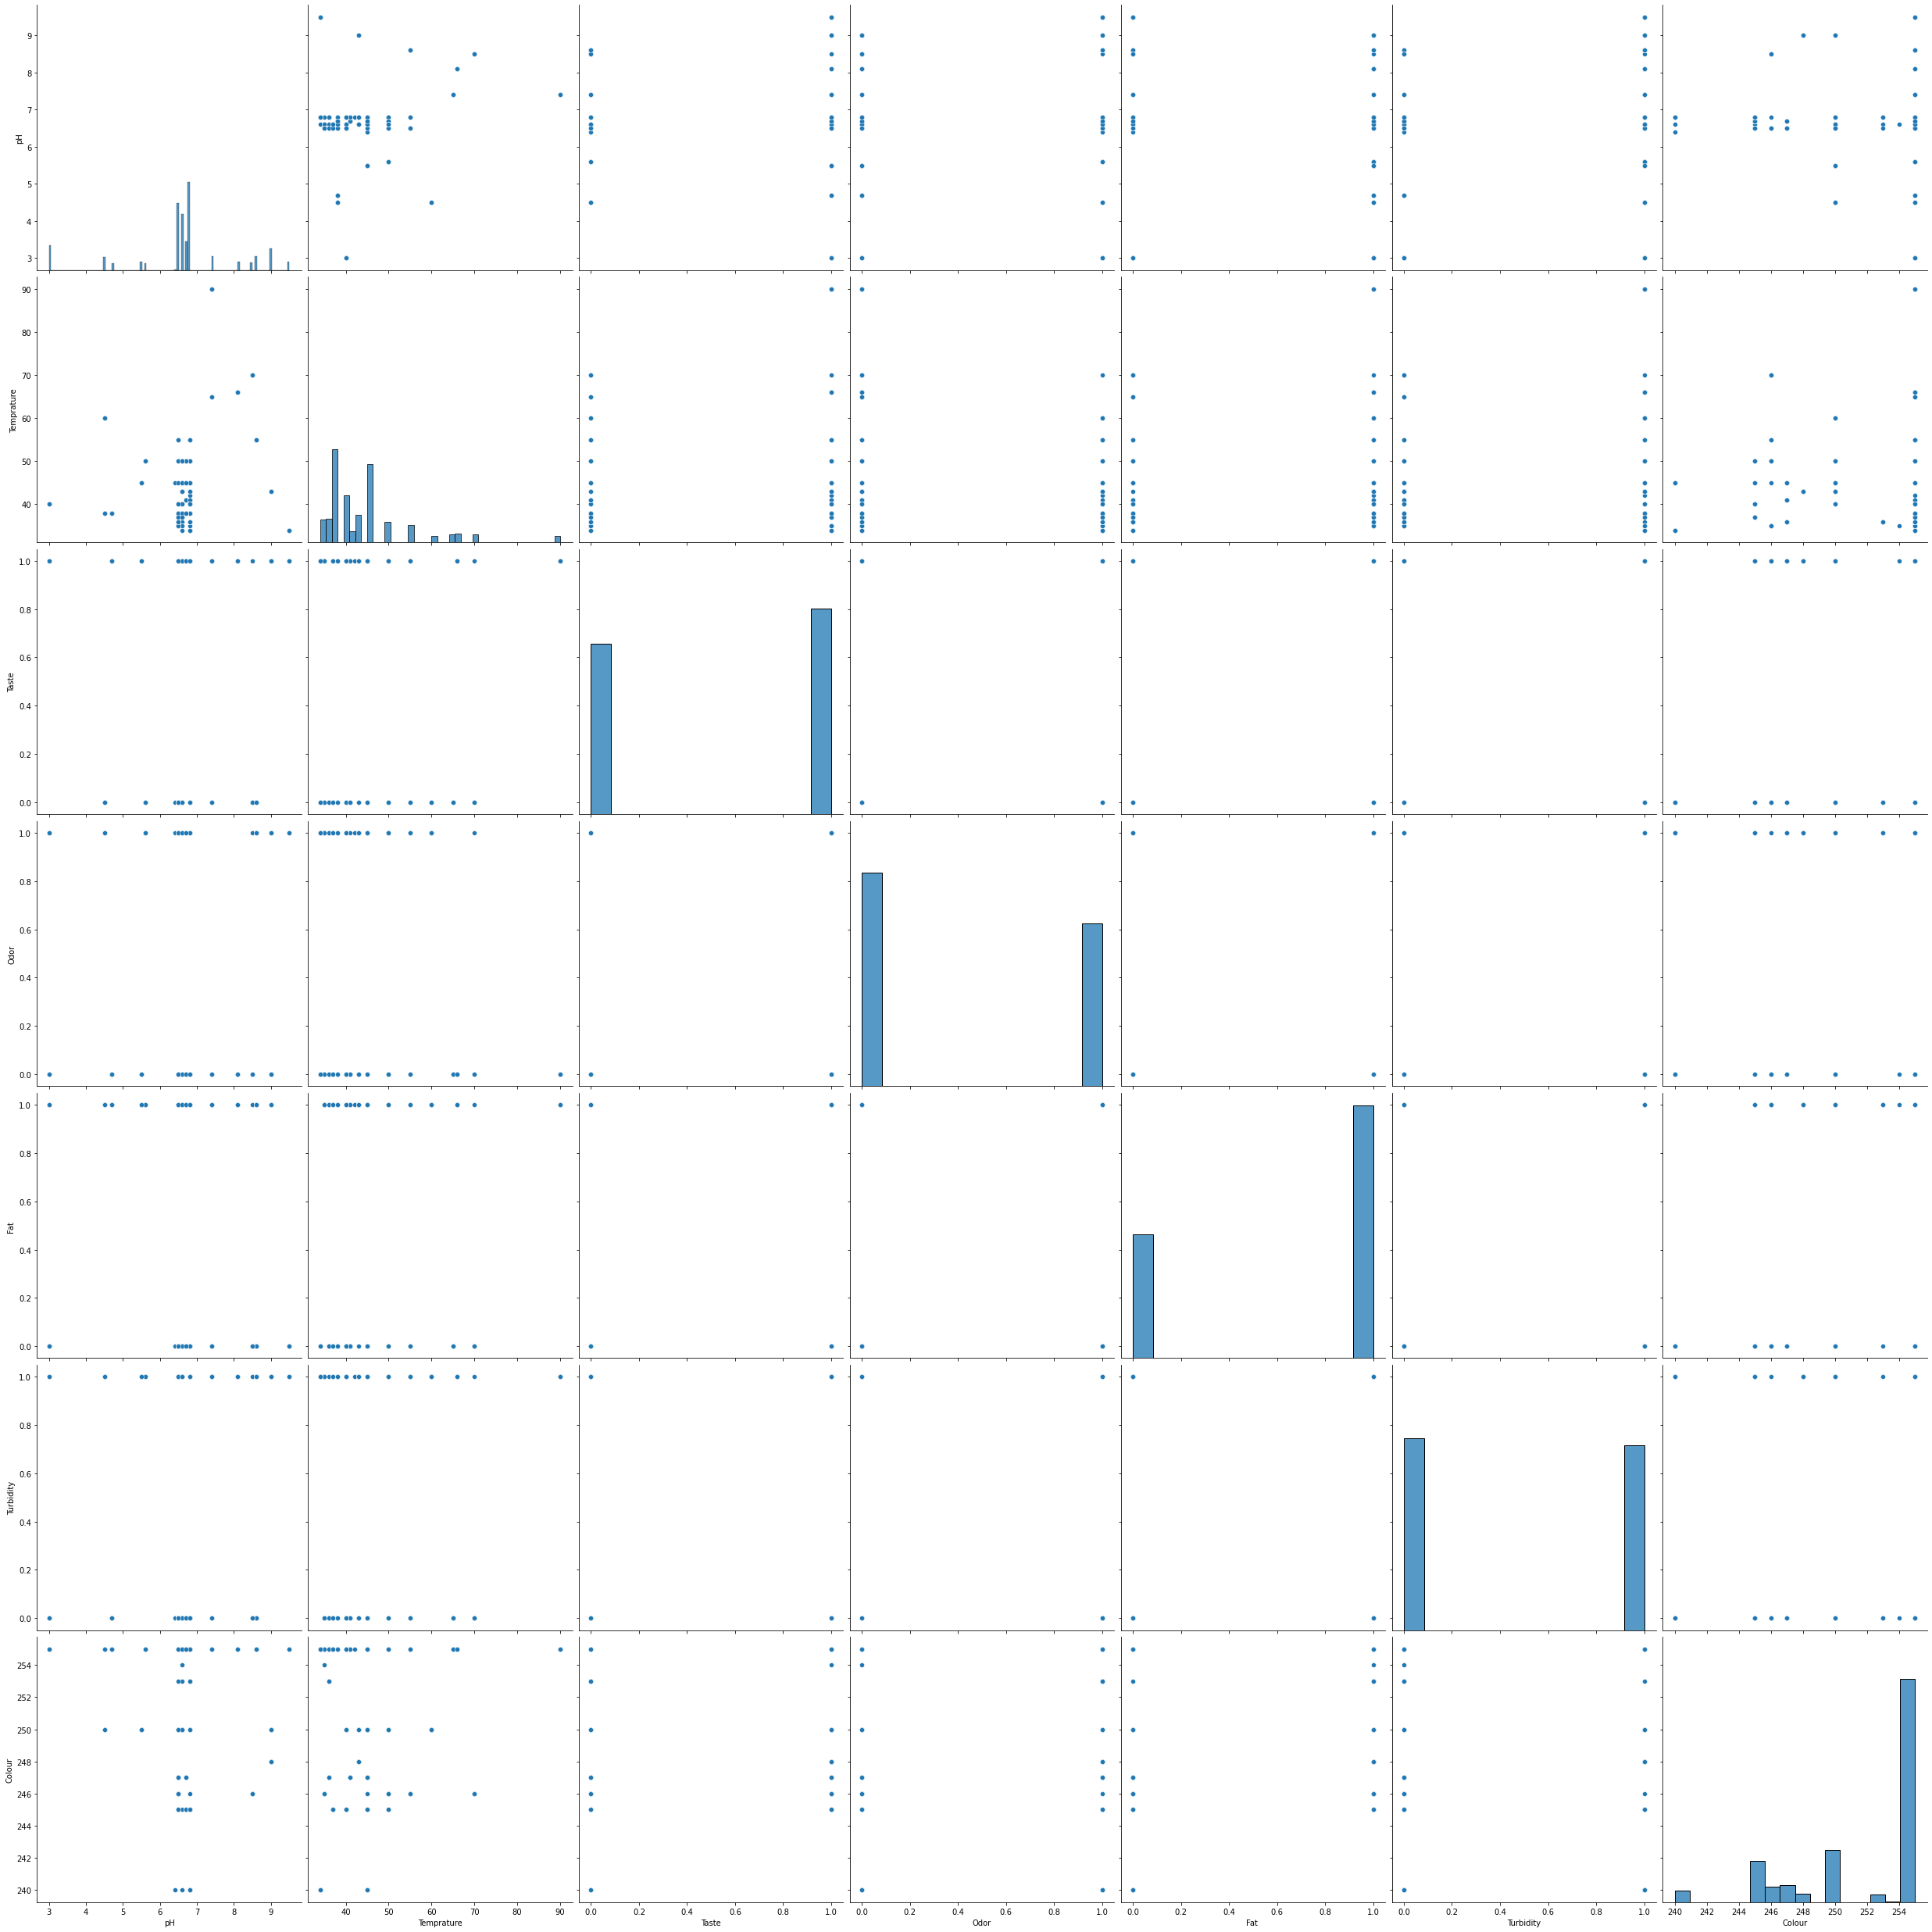

In [18]:
sns.pairplot(df,height=5)

in the above pairplot typically displays scatter plots between all possible pairs of variables in dataset. the digonal of 
the pairplot usually shows the distribution of each variable. the scatter plot on lower tringle of the pairplot show the
relationship between two varible while the upper triangle shows the same realtionship but with the axes reversed.

In [62]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [70]:
#initialize label encoder object
le=LabelEncoder()

In [69]:
df["Grade"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [73]:
labels=df['Grade']

In [76]:
#call the fit method to learn the mapping between the labels and their encoded representations
le.fit(labels)

LabelEncoder()

In [88]:
encoded_labels=le.transform(['high', 'low', 'medium'])


In [90]:
# call inverse_transform method to decode encoded labels
decoded_labels=le.inverse_transform(encoded_labels)
print(encoded_labels)
print(decoded_labels)

[0 1 2]
['high' 'low' 'medium']


if we have catagorical variable for ex- large, small then we cannot directly provide it to machine 
it wont be able to understand so ml algoritm involves lots of mathematical calculation so in this case we will use label encoder because we have order fetures in traget variable 
Grade like high low and mediam

after converting into label encodings you can identiy the unique values by using the inverse_transform() method of the LabelEncoder class in Python. this method will convert the encoded labels back into their original values. You can then use the unique() function to get an array of the unique values.

<AxesSubplot:>

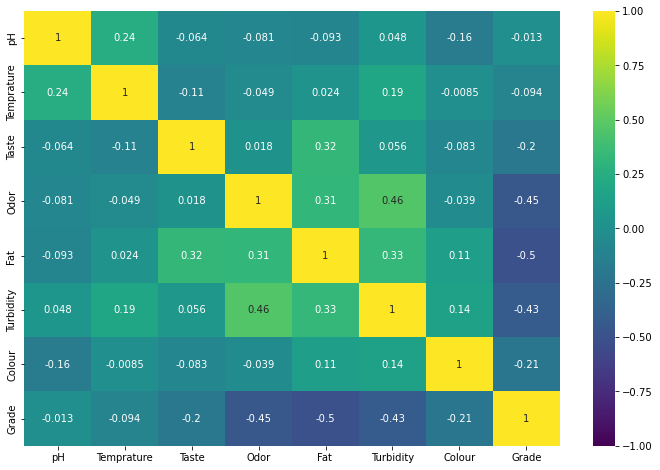

In [23]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=1.0, vmin=-1.0, cmap='viridis', annot=True)

as we can anlyse max value is 1 and min value is -1 so which parameter is contributing and affecting the grade of the milk 
higher the value of the fat contents leads to lower the grade value of the milk colurs represents the intensity of the data.
if the ph values increases then basic property of the milk and if the ph value is decreases the more acidic property of the milk will increases.

In [24]:
X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = df[['Grade']]

In [25]:
# standardization of data
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler_fit=scaler.fit(X)

In [28]:
# generate the standardize value of x and y
X=scaler_fit.transform(X)

in order to avoid overfitting we were actually doing train test split

In [29]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape

(741, 7)

In [31]:
X_test.shape

(318, 7)

In [32]:
y_train.shape

(741, 1)

In [33]:
y_test.shape

(318, 1)

# model building

# decision tree classifier

here we use first model i.e DTC for lebel data it is tree like model that makes decision by splitting the data into smaller
subsets based on the value of the input features.at each node of the tree decision is made based on the value of the input 
features, and the data is split into two or more subsets , this process continue recursively until the stopping criterian is met.


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt_classifier=DecisionTreeClassifier(max_depth = 3)
dt_classifier.fit(X_train, y_train)
dt_predict=dt_classifier.predict(X_test)


# creating confusion matrix

In [93]:
cm=confusion_matrix(y_test, dt_predict)

In [94]:
accuracy=dt_classifier.score(X_test,dt_predict)
print(accuracy*100,'%')

100.0 %


In [95]:
print(cm)
print()
print("classification report\n",classification_report(y_test,dt_predict))

[[  0   0  76]
 [  0 113   2]
 [  0   0 127]]

classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       1.00      0.98      0.99       115
           2       0.62      1.00      0.77       127

    accuracy                           0.75       318
   macro avg       0.54      0.66      0.59       318
weighted avg       0.61      0.75      0.66       318



heare we get accuracy 100% that means our model is overfitted due to outliers algorithm more robust to outliers and noice 
practically it is not good thats why we try some other algoritm.The decision tree algorithm works by selecting the feature that provides the most information gain, or reduction in impurity, at each node. Information gain is typically measured by entropy or Gini impurity, which are measures of the degree of randomness or uncertainty in the class distribution at a given node. The algorithm stops when all the observations in a node belong to the same class, or when some other stopping criterion is met, such as a maximum depth or a minimum number of observations per node.

# SVM (Support vector machine) classifier

In [38]:
# training linear SVM classifier

In [39]:
from sklearn.svm import SVC

In [40]:
model=SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [41]:
svm_pred=model.predict(X_test)

In [42]:
print(svm_pred)

[1 1 1 1 2 1 1 0 0 0 1 2 0 2 1 1 0 2 2 2 0 2 0 2 2 0 2 0 1 1 2 2 0 0 0 2 2
 0 2 2 1 1 0 0 0 0 0 0 2 0 2 1 0 2 2 1 0 1 1 2 2 1 1 0 0 0 2 1 1 2 1 1 0 2
 1 1 1 2 1 1 2 2 0 0 2 2 0 1 2 0 1 1 0 0 1 1 0 2 0 0 1 1 1 1 2 2 1 1 2 0 0
 2 2 1 0 0 2 1 0 0 2 1 1 1 2 0 2 2 0 2 1 2 1 2 1 1 2 1 2 2 2 0 1 2 1 1 2 1
 1 2 2 2 0 1 2 0 1 0 1 0 2 2 2 1 2 0 1 1 2 1 0 0 1 1 0 1 2 2 2 2 1 2 0 1 0
 1 2 0 2 1 1 2 0 1 0 1 1 1 2 2 0 2 0 0 2 1 2 0 2 2 0 0 2 2 0 1 1 0 2 1 2 2
 0 0 1 0 1 0 2 0 0 1 2 0 0 1 2 1 2 1 1 0 0 1 1 0 1 2 1 1 0 0 2 0 2 2 1 2 1
 0 1 0 0 0 2 1 0 0 2 0 2 2 1 0 2 1 1 1 2 0 2 0 1 0 1 1 1 2 0 2 1 1 2 0 2 1
 0 0 2 1 2 0 0 2 1 1 1 0 2 2 2 0 2 2 2 1 2 0]


In [43]:
# model accuracy for X_test  
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

85.84905660377359 %


In [44]:
# creating confusion matrix

In [45]:
cm=confusion_matrix(y_test,svm_pred)
print(cm)
print()
print("clssification report\n")
print( classification_report(y_test,svm_pred))

[[ 70   3   3]
 [ 15  98   2]
 [ 14   8 105]]

clssification report

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        76
           1       0.90      0.85      0.88       115
           2       0.95      0.83      0.89       127

    accuracy                           0.86       318
   macro avg       0.85      0.87      0.85       318
weighted avg       0.88      0.86      0.86       318



# KNN (k-nearest neighbors) classifier

In [46]:
# training a knn classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier


In [48]:
# knn=KNeighbhorsClassifier(n_neighbors=42)
knn = KNeighborsClassifier(n_neighbors = 42)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [49]:
# accuracy on x_test
accuracy=knn.score(X_test, y_test)
print(accuracy*100,'%')

86.79245283018868 %


In [50]:
# creating confusion matrix
knn_prediction=knn.predict(X_test)
cm=confusion_matrix(y_test, knn_prediction)
print(classification_report(knn_prediction,y_test))
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        86
           1       0.86      0.97      0.91       102
           2       0.89      0.87      0.88       130

    accuracy                           0.87       318
   macro avg       0.86      0.86      0.86       318
weighted avg       0.87      0.87      0.87       318

[[ 64   3   9]
 [  8  99   8]
 [ 14   0 113]]


# naive bays classifier

In [51]:
# training naive bayes classifier



In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  

In [54]:
# accuracy on x_test

In [55]:
accuracy=gnb.score(X_test, y_test)
print(accuracy*100,'%')
print()
print(classification_report(y_test,gnb_predictions))

90.25157232704403 %

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        76
           1       0.94      0.94      0.94       115
           2       0.89      0.91      0.90       127

    accuracy                           0.90       318
   macro avg       0.90      0.90      0.90       318
weighted avg       0.90      0.90      0.90       318



In [56]:
cm=confusion_matrix(y_test, gnb_predictions)
print(cm)

[[ 64   0  12]
 [  5 108   2]
 [  5   7 115]]


end